<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%2022/Histogram_Manipulation_for_Color_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color correction using Histogram Manipulation

**Reference**:
- [Image Processing with Python: Color Correction using Histogram Manipulation](https://medium.com/swlh/image-processing-with-python-histogram-manipulation-on-digital-images-d4fb426d3513)

## Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.exposure import histogram, cumulative_distribution

## Loading the image

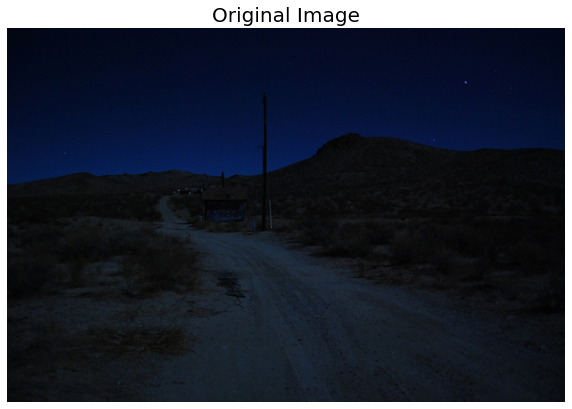

In [2]:
image = imread('../Data/Images/Lane.jpg')
plt.figure(figsize = (10, 10))
plt.imshow(image)
plt.axis(False)
plt.title('Original Image', fontsize = 20)
plt.show()

## Color correction in grayscale

### PDF and CDF in grayscale

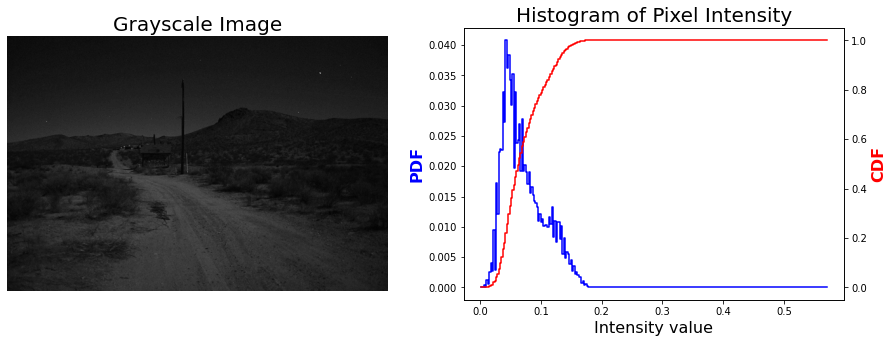

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
image_gray = rgb2gray(image)
ax[0].imshow(image_gray, cmap='gray')
ax[0].axis(False)
ax[0].set_title('Grayscale Image', fontsize = 20)
ax1 = ax[1]
ax2 = ax1.twinx()
freq_h, bins_h = histogram(image_gray)
freq_c, bins_c = cumulative_distribution(image_gray)
ax1.step(bins_h, freq_h*1.0/freq_h.sum(), c='b', label='PDF')
ax2.step(bins_c, freq_c, c='r',  label='CDF')
ax1.set_ylabel('PDF', color='b', fontsize = 16, fontweight="bold")
ax2.set_ylabel('CDF', color='r', fontsize = 16, fontweight="bold")
ax[1].set_xlabel('Intensity value', fontsize = 16)
ax[1].set_title('Histogram of Pixel Intensity', fontsize = 20);

### Function to get the indices of all elements of array `y` in array `x`

In [4]:
def get_indices(x, y):
    xsorted = np.argsort(x)
    ypos = np.searchsorted(x[xsorted], y)
    return xsorted[ypos]

### Color correction by translating the actual CDF to a linear target CDF

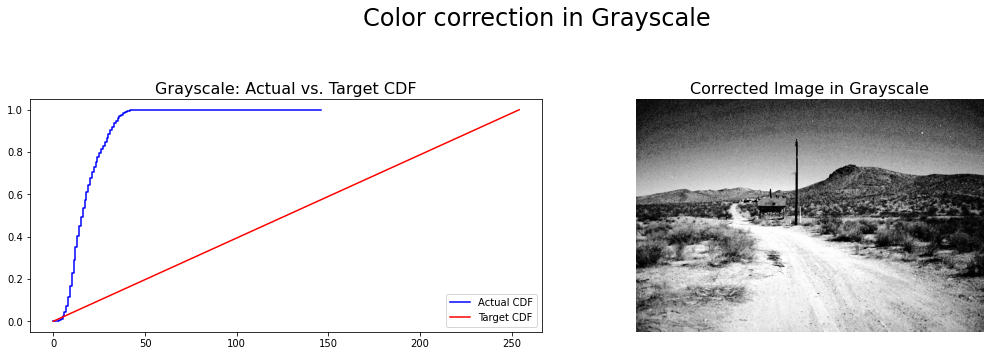

In [5]:
image_intensity = img_as_ubyte(image_gray)
freq, bins = cumulative_distribution(image_intensity)
target_bins = np.arange(255)
target_freq = np.linspace(0, 1, len(target_bins))
new_vals = np.interp(freq, target_freq, target_bins)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].step(bins, freq, c='b', label='Actual CDF')
ax[0].plot(target_bins, target_freq, c='r', label='Target CDF')
ax[0].legend()
ax[0].set_title('Grayscale: Actual vs. '
                'Target CDF', fontsize = 16)
indices = get_indices(bins, image_intensity)
ax[1].imshow(new_vals[indices].astype(np.uint8), 
             cmap='gray')
ax[1].axis(False)
ax[1].set_title('Corrected Image in Grayscale', fontsize = 16)
plt.suptitle('Color correction in Grayscale', fontsize = 24)
plt.tight_layout(rect = [0, 0, 1, 0.9])
plt.show()

## Color Correction across RGB

### Function to show the linear CDF across a channel

In [6]:
def show_linear_cdf(image, channel, name, ax):
    image_intensity = img_as_ubyte(image[:,:,channel])
    freq, bins = cumulative_distribution(image_intensity)
    target_bins = np.arange(255)
    target_freq = np.linspace(0, 1, len(target_bins))
    ax.step(bins, freq, c='b', label='Actual CDF')
    ax.plot(target_bins, target_freq, c='r', label='Target CDF')
    ax.legend()
    ax.set_title(f'{name} Channel: Actual vs. '
                 'Target CDF', fontsize = 16)

### Function to translate the CDF of a particular channel in the image to the target linear CDF

In [7]:
def linear_distribution(image, channel):
    image_intensity = img_as_ubyte(image[:,:,channel])
    freq, bins = cumulative_distribution(image_intensity)
    target_bins = np.arange(255)
    target_freq = np.linspace(0, 1, len(target_bins))
    new_vals = np.interp(freq, target_freq, target_bins)
    indices = get_indices(bins, image_intensity)
    return new_vals[indices].astype(np.uint8)

### Corrected images across the RGB channels

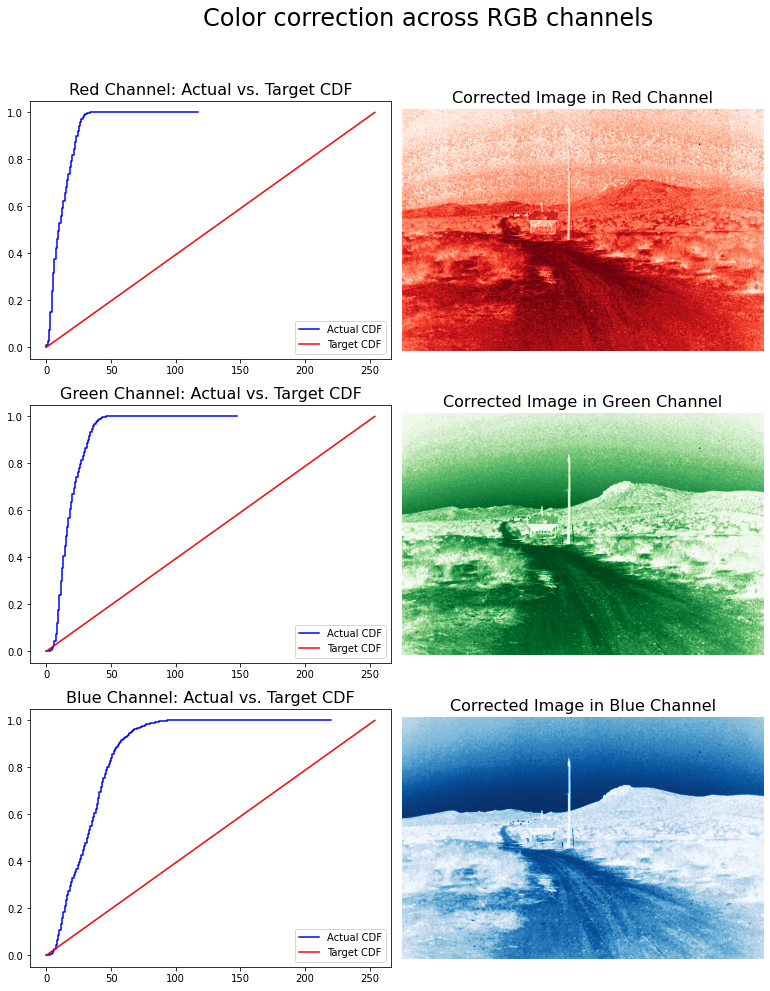

In [8]:
fig, ax = plt.subplots(3,2, figsize=(12,14))
red_channel = linear_distribution(image, 0)
green_channel = linear_distribution(image, 1)
blue_channel = linear_distribution(image, 2)
show_linear_cdf(image, 0,'Red', ax[0,0])
ax[0,1].imshow(red_channel, cmap='Reds')
ax[0,1].set_title('Corrected Image in Red Channel', fontsize = 16)
ax[0,1].axis(False)
show_linear_cdf(image, 1, 'Green', ax[1,0])
ax[1,1].imshow(green_channel, cmap='Greens')
ax[1,1].set_title('Corrected Image in Green Channel', fontsize = 16)
ax[1,1].axis(False)
show_linear_cdf(image, 2, 'Blue', ax[2,0])
ax[2,1].imshow(blue_channel, cmap='Blues')
ax[2,1].set_title('Corrected Image in Blue Channel', fontsize = 16)
ax[2,1].axis(False)
plt.suptitle('Color correction across RGB channels', fontsize = 24)
plt.tight_layout(rect = [0, 0, 0.9, 0.95])
plt.show()

### Stacking the corrected channels to generate the final image

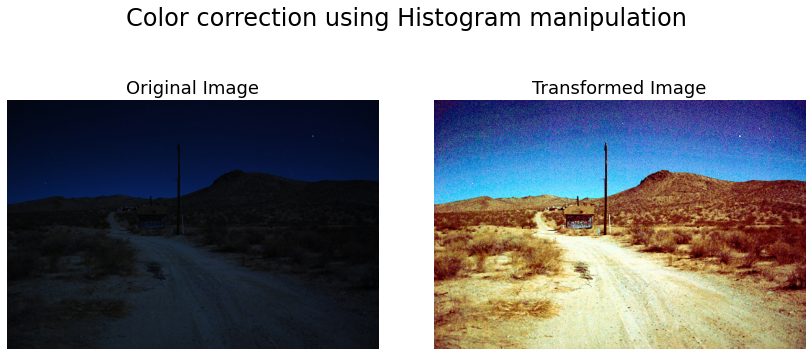

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(image);
ax[0].axis(False)
ax[0].set_title('Original Image', fontsize = 18)
transformed_image = np.dstack([red_channel, green_channel, blue_channel])
ax[1].imshow(transformed_image);
ax[1].axis(False)
ax[1].set_title('Transformed Image', fontsize = 18)
plt.suptitle('Color correction using Histogram manipulation', fontsize = 24)
plt.tight_layout(rect = [0.1, 0, 0.9, 0.88]);

In [10]:
matplotlib.image.imsave('transformed.jpg', transformed_image)